###__Dane do analizy__:  MNIST.csv (Modified National Institute of Standards and Technology database)

###__Cel badania__:  Analiza algorytmu selekcji cech PCA . Wizualizacja danych  za pomocą PCA i t-SNE

###__Klasyfikator__:   Decision tree, kNN, Logistic Regression  +PCA

####__Zadanie 1__: Ładowanie zbioru treningowego, testowego, wstępna analiza  i dodawanie nazw dla kolumn
* Dodać nazwy kolumn: <span style='color:red'>  class, pixel1, pixel2,...pixel 784 </span>
* Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
* Wyznaczyć rozkład kategorii (w procentach).
* Narysować wykres słupkowy rozkładu kategorii.

#####__Zadanie 2__:  Analiza głównych składowych <i>PCA</i>

__Wskazówka__: <span style='color:red'>  from sklearn.decomposition import PCA </span>
##### __Zadanie 2.1__:  Zmienić parametru algorytmu, żeby otrzymać procent wyjaśnionej wariancji wynosi 0.90. Ile wynosi liczba wymiarów?
__Wskazówka: Zmienić parametry__
* Ustawić pca.explained_variance_ratio_
#####__Zadanie 2.2__ :Ile wynosi stopień wyjaśnionej wariancji, jeśli liczna wymiarów należy do przedziału od  [10, 150]?.

####__Zadanie 3__ : Wyznaczyć liczbę wymiarów PCA, żeby stopień wyjaśnionej wariancji = 0.9. Wykonać redukcję danych. Przekształcić dane treningowe i testowe na nową przestrzenią.


####__Zadanie 4__ : Wizualizować  dane oryginalne i dane skompresowane.

##### __Zadanie__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas
__Wskazówka__: <span style='color:red'>   from sklearn.tree import DecisionTreeClassifier </span>

####__Zadanie 6__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych skompresowanych.  Wyświetlić czas.

####__Zadanie 7__: Trenować klasyfikator  <i> Logistic Regression </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas i skuteczność modelu.
__Wskazówka__: <span style='color:red'>  from sklearn.linear_model import LogisticRegression  </span>

####__Zadanie 8__: Trenować klasyfikator  <i>k-NN </i>  z optymalizacją parametrów na danych oryginalnych i zredukowanych.  Wyświetlić czas i skuteczność modelu.

####__Zadanie 9__: Wizualizować dane na dwóch wymiarach wyznaczonych przez t-NSE i PCA (liczba wymiarów =2).

####__Zadanie 10__: Napisać podsumowanie

1. Jaki procent wyjaśnialności wariancji trzeba wybrać, żeby jakość klasyfikatora na danych skompresowanych jest przybliżona do modelu budowanego na danych oryginalnych?
klasyfikator jest najlepszy i z jakimi parametrami?
2. Wśród algorytmów DT, KNN i Logistic Regression, który model zyskuje najwięcej czasu na danych zredukowanych?
3. Która wizualizacja jest lepsza, za pomocą t-SNE (*t-distributed Stochastic Neighbor Embedding*), czy PCA?


In [15]:
import pandas as pd
import numpy as np

path = "./"
df_train = pd.read_csv(path+"mnist_train.csv")
df_test = pd.read_csv(path+"mnist_test.csv")


In [16]:
column_names = ['class'] + ['pixel{}'.format(i) for i in range(1, 785)]
df_train.columns = column_names
df_test.columns = column_names

In [17]:
df_train['class'].value_counts().apply(lambda x: x/np.sum(df_train['class'].value_counts()))

class
1    0.114144
7    0.104669
3    0.103638
9    0.101183
0    0.099367
6    0.098581
4    0.097550
2    0.096176
8    0.096028
5    0.088664
Name: count, dtype: float64

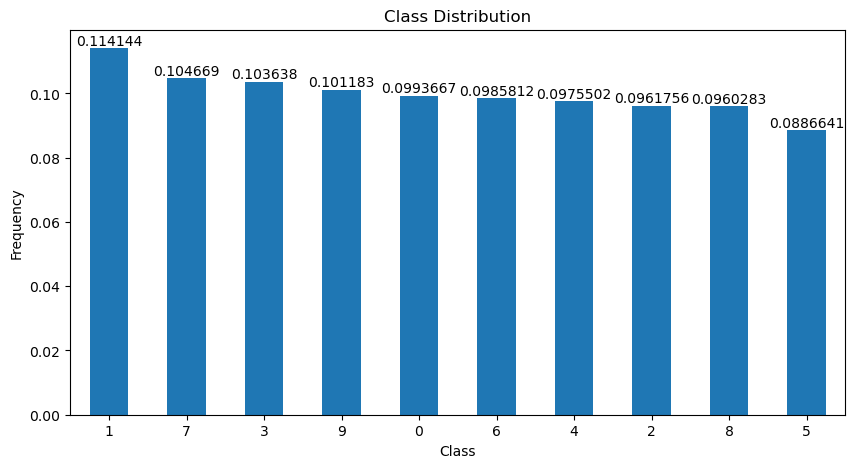

In [18]:

import matplotlib.pyplot as plt

categories = df_train['class'].value_counts()
categories = df_train['class'].value_counts().apply(lambda x: x/np.sum(df_train['class'].value_counts()))
# categories = categories.sort_index()

plt.figure(figsize=(10, 5))
categories.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

In [19]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(20369, 784)
(9999, 784)


In [14]:
df_train

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20365,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20366,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20367,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
for x in df_train.columns:
    print(sum(df_train[x].isna()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [11]:
print(sum(df_train.isna()))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
pca = PCA(n_components=11)
X_reduced = pca.fit_transform(X_train)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
start_val, end_val = 50, 150
results = {}
threshold = 0.9
best_n_components = start_val
best_explained_variance_ratio = 0
found = False
for i in range(start_val, end_val+1):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    sum = np.sum(pca.explained_variance_ratio_)
    results[i] = sum
    print(f"n_components={i}, explained_variance_ratio={sum}")
    if found == False:
        if sum > threshold:
            best_n_components = i
            best_explained_variance_ratio = sum
            found = True

NameError: name 'PCA' is not defined

In [ ]:
import matplotlib.pyplot as plt
def visualize_dataset(dataset):
    plt.figure(figsize=(10,4))
    for i in range(8):
    plt.subplot(240+1+i)
    ith_image = dataset.iloc[i,:]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
pca = PCA(n_components = 11)
X_reduced_np = pca.fit_transform(X_train)
X_recovered_np = pca.inverse_transform(X_reduced)
X_reduced = pd.DataFrame(X_reduced_np)
X_recovered = pd.DataFrame(X_recovered_np)